Just in case someone is still stuck on Python 2:

In [1]:
from __future__ import print_function

DecayLanguage imports

In [2]:
from particle import Particle, SpinType
from decaylanguage.modeling.goofit import GooFitChain, SF_4Body

Pretty colors

In [3]:
from plumbum import colors

colors.use_color = 2

In [4]:
lines, all_states = GooFitChain.read_ampgen("../models/DtoKpipipi_v2.txt")

### Look at an example line

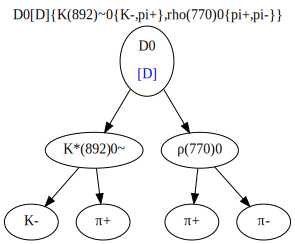

In [5]:
lines[0]

In [6]:
for seen_factor in {p.spindetails() for p in lines}:
    my_lines = [p for p in lines if p.spindetails() == seen_factor]
    print(colors.bold | seen_factor, ":", *my_lines[0].spinfactors)
    for line in my_lines:
        colors.blue.print(" ", line)

DtoA1P1_A1toV2P2Dwave_V2toP3P4 : SF_4Body.DtoAP1_AtoVP2Dwave_VtoP3P4 SF_4Body.FF_123_4_L1
  D0{K(1)(1270)~-[D;GSpline.EFF]{K(892)~0{K-,pi+},pi-},pi+}
  D0{a(1)(1260)+[D;GSpline.EFF]{rho(770)0{pi+,pi-},pi+},K-}
DtoV1V2_V1toP1P2_V2toP3P4 : SF_4Body.DtoV1V2_V1toP1P2_V2toP3P4_S
  D0{K(892)~0{K-,pi+},rho(770)0{pi+,pi-}}
  D0{rho(1450)0{pi+,pi-},K(892)~0{K-,pi+}}
Dtos1P1_s1toV2P2_V2toP3P4 : SF_4Body.DtoPP1_PtoVP2_VtoP3P4
  D0{K(1460)~-[GSpline.EFF]{K(892)~0{K-,pi+},pi-},pi+}
DtoV1V2_V1toP1P2_V2toP3P4_D : SF_4Body.DtoV1V2_V1toP1P2_V2toP3P4_D SF_4Body.FF_12_34_L2
  D0[D]{K(892)~0{K-,pi+},rho(770)0{pi+,pi-}}
  D0[D]{rho(1450)0{pi+,pi-},K(892)~0{K-,pi+}}
Dtos1P1_s1toS2P2_S2toP3P4 : SF_4Body.DtoPP1_PtoSP2_StoP3P4
  D0{K(1460)~-[GSpline.EFF]{PiPi30[kMatrix.pole.0]{pi+,pi-},K-},pi+}
  D0{K(1460)~-[GSpline.EFF]{PiPi30[kMatrix.pole.1]{pi+,pi-},K-},pi+}
  D0{K(1460)~-[GSpline.EFF]{PiPi30[kMatrix.prod.1]{pi+,pi-},K-},pi+}
DtoV1S2_V1toP1P2_S2toP3P4 : SF_4Body.DtoVS_VtoP1P2_StoP3P4 SF_4Body.FF_12_34_L1
 

In [7]:
for spintype, c in zip(SpinType, colors):
    ps = [
        c | format(str(p), "11")
        for p in GooFitChain.all_particles
        if p.spin_type == spintype
    ]
    print(c & colors.bold | "{:>12}:".format(spintype.name), *ps)

      Scalar: KPi20       PiPi30      PiPi00      PiPi10      KPi10       PiPi20      KPi00      
PseudoScalar: D0          pi-         pi+         K(1460)~-   K-         
      Vector: omega(782)0 K(892)~0    rho(770)0   rho(1450)0 
       Axial: K(1)(1270)~- a(1)(1260)+ K(1)(1400)~-
      Tensor: K(2)~-     
PseudoTensor:
     Unknown:


In [8]:
for n, line in enumerate(lines):
    print(
        colors.bold | "{:2}".format(n),
        "{:<70}".format(str(line)),
        colors.bold & colors.blue | "spinfactors:",
        colors.blue | str(len(line.spinfactors)),
        colors.bold & colors.magenta | "L:",
        colors.magenta | "{0} [{1[0]}-{1[1]}]".format(line.L, line.L_range()),
    )

 0 D0[D]{K(892)~0{K-,pi+},rho(770)0{pi+,pi-}}                             spinfactors: 2 L: 2 [0-2]
 1 D0[D]{rho(1450)0{pi+,pi-},K(892)~0{K-,pi+}}                            spinfactors: 2 L: 2 [0-2]
 2 D0[P]{K(892)~0{K-,pi+},rho(770)0{pi+,pi-}}                             spinfactors: 2 L: 1 [0-2]
 3 D0[P]{rho(1450)0{pi+,pi-},K(892)~0{K-,pi+}}                            spinfactors: 2 L: 1 [0-2]
 4 D0{K(1)(1270)~-[D;GSpline.EFF]{K(892)~0{K-,pi+},pi-},pi+}              spinfactors: 2 L: 1 [1-1]
 5 D0{K(1)(1270)~-[GSpline.EFF]{K(892)~0{K-,pi+},pi-},pi+}                spinfactors: 2 L: 1 [1-1]
 6 D0{K(1)(1270)~-[GSpline.EFF]{KPi20[FOCUS.Kpi]{K-,pi+},pi-},pi+}        spinfactors: 2 L: 1 [1-1]
 7 D0{K(1)(1270)~-[GSpline.EFF]{omega(782)0{pi+,pi-},K-},pi+}             spinfactors: 2 L: 1 [1-1]
 8 D0{K(1)(1270)~-[GSpline.EFF]{rho(1450)0{pi+,pi-},K-},pi+}              spinfactors: 2 L: 1 [1-1]
 9 D0{K(1)(1270)~-[GSpline.EFF]{rho(770)0{pi+,pi-},K-},pi+}               spinfactors: 2 L: 1 [1-1]


### We can make the GooFit Intro code:

In [9]:
colors.bold.print("All discovered spin configurations:")

for line in sorted({line.spindetails() for line in lines}):
    print(line)

All discovered spin configurations:
DtoA1P1_A1toS2P2_S2toP3P4
DtoA1P1_A1toV2P2Dwave_V2toP3P4
DtoA1P1_A1toV2P2_V2toP3P4
DtoS1S2_S1toP1P2_S2toP3P4
DtoT1P1_T1toV2P2_V2toP3P4
DtoV1S2_V1toP1P2_S2toP3P4
DtoV1V2_V1toP1P2_V2toP3P4
DtoV1V2_V1toP1P2_V2toP3P4_D
DtoV1V2_V1toP1P2_V2toP3P4_P
Dtos1P1_s1toS2P2_S2toP3P4
Dtos1P1_s1toV2P2_V2toP3P4


In [10]:
colors.bold.print("All known spin configurations:")

for e in SF_4Body:
    print(e.name)

All known spin configurations:
DtoPP1_PtoSP2_StoP3P4
DtoPP1_PtoVP2_VtoP3P4
DtoV1V2_V1toP1P2_V2toP3P4_S
DtoV1V2_V1toP1P2_V2toP3P4_P
DtoV1V2_V1toP1P2_V2toP3P4_D
DtoAP1_AtoVP2_VtoP3P4
DtoAP1_AtoVP2Dwave_VtoP3P4
DtoVS_VtoP1P2_StoP3P4
DtoV1P1_V1toV2P2_V2toP3P4
DtoAP1_AtoSP2_StoP3P4
DtoTP1_TtoVP2_VtoP3P4
FF_12_34_L1
FF_12_34_L2
FF_123_4_L1
FF_123_4_L2
ONE


In [11]:
print(GooFitChain.make_intro(all_states))

    // Event type: D0 ->  K- (0)   pi+ (1)   pi+ (2)   pi- (3)

    std::vector<std::vector<Lineshape*>> line_factor_list;
    std::vector<std::vector<SpinFactor*>> spin_factor_list;
    std::vector<Amplitude*> amplitudes_list;

    constexpr fptype PI_P     { 0.13957018     };
    constexpr fptype PI_M     { 0.13957018     };
    constexpr fptype D_0      { 1.86484        };
    constexpr fptype K_M      { 0.493677       };

    Variable K892_0_M        { "K892_0_M"           , 0.896      };
    Variable K892_0_W        { "K892_0_W"           , 0.0503     };
    Variable rho1450_0_M     { "rho1450_0_M"        , 1.465      };
    Variable rho1450_0_W     { "rho1450_0_W"        , 0.4        };
    Variable PiPi0_0_M       { "PiPi0_0_M"          , 9.99       };
    Variable PiPi0_0_W       { "PiPi0_0_W"          , 9900000    };
    Variable PiPi1_0_M       { "PiPi1_0_M"          , 9.99       };
    Variable PiPi1_0_W       { "PiPi1_0_W"          , 9900000    };
    Variable PiPi2_0_M    

In [12]:
colors.green.print("    // Parameters")
print(GooFitChain.make_pars())

    // Parameters
    Variable D0_radius {"D0_radius", 0.0037559 };
    Variable IS_p1_4pi {"IS_p1_4pi", 0 };
    Variable IS_p1_EtaEta {"IS_p1_EtaEta", -0.39899 };
    Variable IS_p1_EtapEta {"IS_p1_EtapEta", -0.34639 };
    Variable IS_p1_KK {"IS_p1_KK", -0.55377 };
    Variable IS_p1_mass {"IS_p1_mass", 0.651 };
    Variable IS_p1_pipi {"IS_p1_pipi", 0.22889 };
    Variable IS_p2_4pi {"IS_p2_4pi", 0 };
    Variable IS_p2_EtaEta {"IS_p2_EtaEta", 0.39065 };
    Variable IS_p2_EtapEta {"IS_p2_EtapEta", 0.31503 };
    Variable IS_p2_KK {"IS_p2_KK", 0.55095 };
    Variable IS_p2_mass {"IS_p2_mass", 1.2036 };
    Variable IS_p2_pipi {"IS_p2_pipi", 0.94128 };
    Variable IS_p3_4pi {"IS_p3_4pi", 0.55639 };
    Variable IS_p3_EtaEta {"IS_p3_EtaEta", 0.1834 };
    Variable IS_p3_EtapEta {"IS_p3_EtapEta", 0.18681 };
    Variable IS_p3_KK {"IS_p3_KK", 0.23888 };
    Variable IS_p3_mass {"IS_p3_mass", 1.55817 };
    Variable IS_p3_pipi {"IS_p3_pipi", 0.36856 };
    Variable IS_p4_4pi {"IS_p4_4p

### And the lines can be turned into code, as well:

In [13]:
colors.green.print("    // Lines")
for n, line in enumerate(lines):
    colors.green.print("    // Line", n)
    print(line.to_goofit(all_states[1:]), end="\n\n\n")

    // Lines
    // Line 0
    // D0[D]{K(892)~0{K-,pi+},rho(770)0{pi+,pi-}}

    spin_factor_list.push_back(std::vector<SpinFactor*>({
        new SpinFactor("SF", SF_4Body::DtoV1V2_V1toP1P2_V2toP3P4_D          , 0, 1, 2, 3),
        new SpinFactor("SF", SF_4Body::FF_12_34_L2                          , 0, 1, 2, 3),
        new SpinFactor("SF", SF_4Body::DtoV1V2_V1toP1P2_V2toP3P4_D          , 0, 2, 1, 3),
        new SpinFactor("SF", SF_4Body::FF_12_34_L2                          , 0, 2, 1, 3)
    }));

    line_factor_list.push_back(std::vector<Lineshape*>{
        new Lineshapes::RBW("K*(892)bar0", K892_0_M, K892_0_W, 1, M_12, FF::BL2),
        new Lineshapes::RBW("rho(770)0", rho770_0_M, rho770_0_W, 1, M_12, FF::BL2),
        new Lineshapes::RBW("K*(892)bar0", K892_0_M, K892_0_W, 1, M_13, FF::BL2),
        new Lineshapes::RBW("rho(770)0", rho770_0_M, rho770_0_W, 1, M_13, FF::BL2)
    });

    amplitudes_list.push_back(new Amplitude{
        "D0[D]{K(892)~0{K-,pi+},rho(770)0{pi+,pi-}

    DK3P_DI.amplitudes_B.push_back(amplitudes_list.back());


    // Line 20
    // D0{KPi00[FOCUS.I32]{K-,pi+},PiPi00[kMatrix.prod.0]{pi+,pi-}}

    spin_factor_list.push_back(std::vector<SpinFactor*>({
        new SpinFactor("SF", SF_4Body::ONE                                  , 0, 1, 2, 3),
        new SpinFactor("SF", SF_4Body::ONE                                  , 0, 2, 1, 3)
    }));

    line_factor_list.push_back(std::vector<Lineshape*>{
        new Lineshapes::FOCUS("KPi00", Lineshapes::FOCUS::Mod::I32, KPi0_0_M, KPi0_0_W, 0, M_12, FF::BL2, 1.5),
        new Lineshapes::kMatrix("PiPi00", 0, false,
            sA0, sA, s0_prod, s0_scatt,
            f_scatt, IS_poles,
            PiPi0_0_M, PiPi0_0_W, 0, M_12, FF::BL2, 1.5),
        new Lineshapes::FOCUS("KPi00", Lineshapes::FOCUS::Mod::I32, KPi0_0_M, KPi0_0_W, 0, M_13, FF::BL2, 1.5),
        new Lineshapes::kMatrix("PiPi00", 0, false,
            sA0, sA, s0_prod, s0_scatt,
            f_scatt, IS_poles,
            PiPi0_0_M

    DK3P_DI.amplitudes_B.push_back(amplitudes_list.back());


    // Line 30
    // D0{rho(1450)0{pi+,pi-},K(892)~0{K-,pi+}}

    spin_factor_list.push_back(std::vector<SpinFactor*>({
        new SpinFactor("SF", SF_4Body::DtoV1V2_V1toP1P2_V2toP3P4_S          , 1, 3, 0, 2),
        new SpinFactor("SF", SF_4Body::DtoV1V2_V1toP1P2_V2toP3P4_S          , 2, 3, 0, 1)
    }));

    line_factor_list.push_back(std::vector<Lineshape*>{
        new Lineshapes::RBW("rho(1450)0", rho1450_0_M, rho1450_0_W, 1, M_24, FF::BL2),
        new Lineshapes::RBW("K*(892)bar0", K892_0_M, K892_0_W, 1, M_24, FF::BL2),
        new Lineshapes::RBW("rho(1450)0", rho1450_0_M, rho1450_0_W, 1, M_34, FF::BL2),
        new Lineshapes::RBW("K*(892)bar0", K892_0_M, K892_0_W, 1, M_34, FF::BL2)
    });

    amplitudes_list.push_back(new Amplitude{
        "D0{rho(1450)0{pi+,pi-},K(892)~0{K-,pi+}}",
        mkvar("D0{rho(1450)0{pi+,pi-},K(892)~0{K-,pi+}}_r", false, 0.0109497, 0.00558342),
        mkvar("D0{rho(1450)0{pi+,pi